# Plot downsampled Ancients
Take the high-coverage Ancients, and plot results from their downampled Versions
1. Ancient SA: Are prepared in ./PrepareData/prepare_SA_readcount.ipynb and then run via ./ParallelRuns/parallel_AS_hdf5_callroh.ipynb

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
from matplotlib import gridspec

##############################
import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./PackagesSupport/")
from pp_individual_roh_csvs import create_combined_ROH_df

midway2-0406.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


## Prepare Data

### Ancient South Americans: Take example IPK12

In [109]:
### Get the Individual names
base_path = "./Empirical/1240k/SA_Readcounts/Downsample_IPK12/"
iid = "IPK12"   ###['IPY10', 'IPK12', 'MA577', '894', '895']
suffix = "_roh_full.csv"
down_sampling_covs = np.geomspace(0.04, 1.0, 10)[:6]  # Modify depending on how much Coverage has been loaded
cms = [4, 8, 12]
gap = 0.5

samples = np.array([iid + f"{c:.4f}" for c in down_sampling_covs])   # Numpy Array for better slicing
paths = [os.path.join(base_path, s[:10] + suffix) for s in samples]

df_ipk12s = [] # For each cM cutoff one df
for cm in cms:
    df_ipk12 = create_combined_ROH_df(paths, samples, pops=samples, min_cm=cm, snp_cm=50, gap=gap, output=False)
    df_ipk12["mean_cov"] = down_sampling_covs * 10.439
    df_ipk12s.append(df_ipk12)

In [110]:
### Load the Pseudohaploid Sum ROH
paths = ["./Empirical/Eigenstrat/Reichall/IPK12.SG_roh_full.csv",]
cms = [4, 8, 12]
iids=np.array(["IPK12,"])
sum_rohs_IPK12 = [create_combined_ROH_df(paths, iids, iids, min_cm=cm, snp_cm=50, gap=gap, output=False)["sum_roh"].values[0] for cm in cms]

## Do the Plot

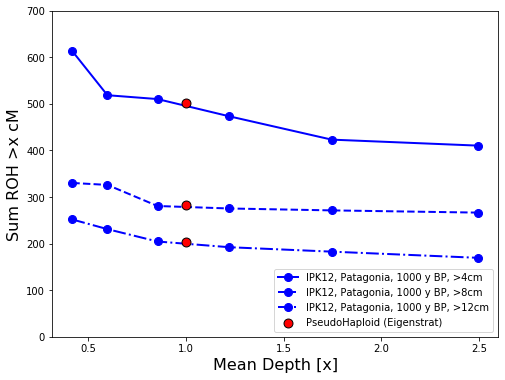

In [112]:
#def plot_downsample_fig(df1):
fs=16
fs_leg=10
mss = ["bo-", "bo--", "bo-."]

plt.figure(figsize=(8, 6))

### IPK12
for i, cm in enumerate(cms):
    df_ipk12 = df_ipk12s[i]
    plt.plot(df_ipk12["mean_cov"], df_ipk12["sum_roh"], mss[i], label=f"IPK12, Patagonia, 1000 y BP, >{cm}cm", lw=2, ms=8, zorder=0)
    
    ### Plot PH Line
plt.scatter(np.ones(len(cms)), sum_rohs_IPK12, c="r", s=80, ec="k", label="PseudoHaploid (Eigenstrat)", zorder=1)
    
    
plt.legend(loc="lower right", fontsize=fs_leg)
plt.ylim([0, 700])

plt.ylabel("Sum ROH >x cM", fontsize=fs)
plt.xlabel("Mean Depth [x]", fontsize=fs)
#plt.xscale("log")
plt.show()

In [ ]:
plot_

# Area 51

In [17]:
df1

,iid,pop,max_roh,sum_roh,n_roh,mean_cov
0,IPK120.0400,IPK120.0400,38.902801,612.954906,72,0.040000
1,IPK120.0572,IPK120.0572,30.416703,518.499900,62,0.057199
2,IPK120.0818,IPK120.0818,30.244600,510.211080,56,0.081792
